In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Dataset

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_87f918dae33a4b2b834f7d6bedb24fa6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Be6Btl_5Etl1TcaS6wV_68nfrZot5V6GwtGo5zMQHNop',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_87f918dae33a4b2b834f7d6bedb24fa6.get_object(Bucket='predictlifeexpectancy-donotdelete-pr-42scae56tsebnf',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()
df = df_data_0
print (df.shape)

(2938, 22)


In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Descriptive Analysis of the Data

In [4]:
df.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)
df.rename(columns = {'thinness__1-19_years':'thinness_10-19_years'}, inplace=True)

In [5]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

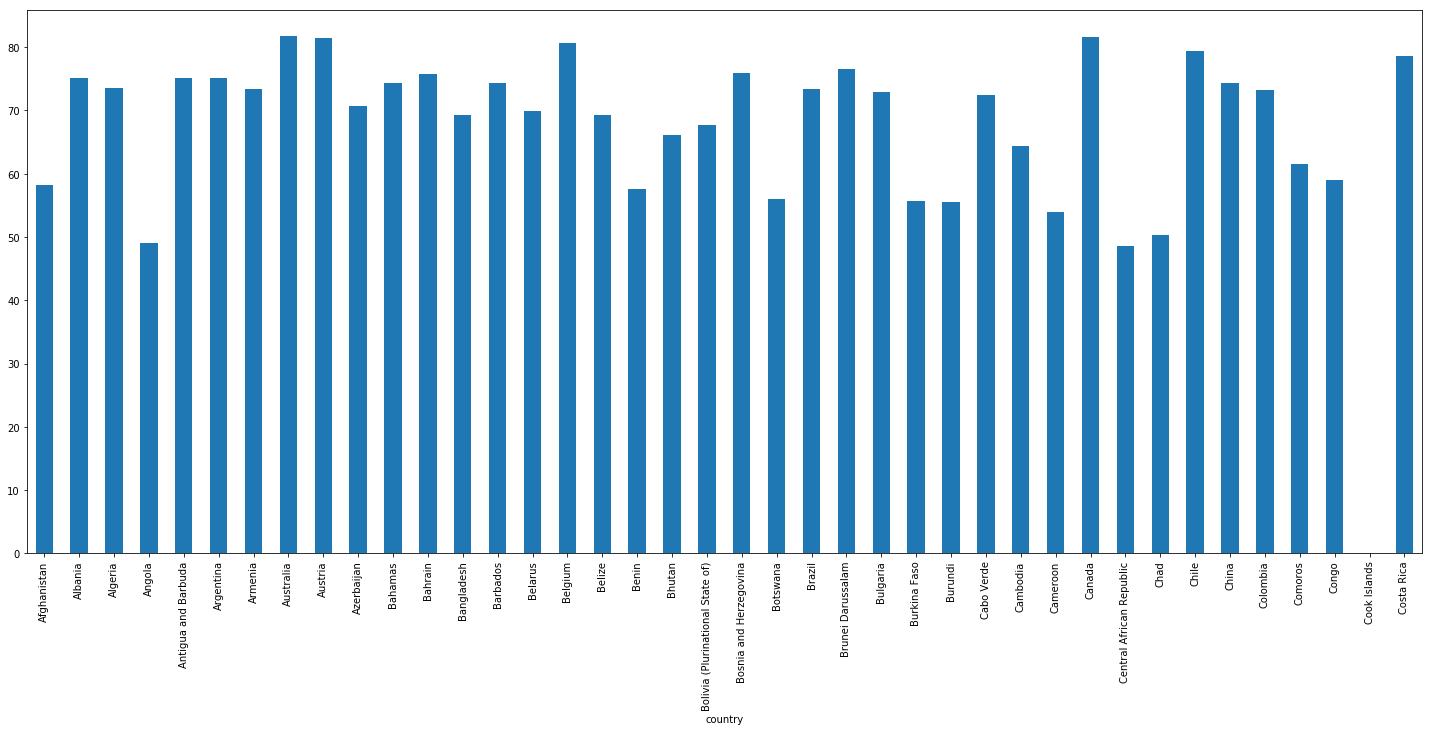

In [6]:
plt.figure(figsize=(25,10))
df.groupby('country')['life_expectancy'].mean().head(40).plot.bar()

In [7]:
# plt.figure(figsize=(25,10))
# # df.groupby('year')['life_expectancy'].mean().plot.bar()

In [8]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [10]:
#list of all columns containing NA values
na_cols =['life_expectancy', 'adult_mortality', 'alcohol', 'hepatitis_b',
       'bmi', 'polio', 'total_expenditure','diphtheria', 'gdp', 'population', 
        'thinness_10-19_years', 'thinness_5-9_years', 
        'income_composition_of_resources', 'schooling']

In [11]:
#filling NA cells with overall mean
for col in na_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [12]:
# Getting percentage of empty data in columns
df.isnull().sum()/len(df)*100

country                            0.0
year                               0.0
status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
bmi                                0.0
under-five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness_10-19_years               0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

In [13]:
print(df.dtypes)

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_10-19_years               float64
thinness_5-9_years                 float64
income_composition_of_resources    float64
schooling                          float64
dtype: object


In [14]:
train_data=df.drop(['life_expectancy'],axis=1)
train_labels = df['life_expectancy']

In [15]:
train_data.shape,train_labels.shape

((2938, 21), (2938,))

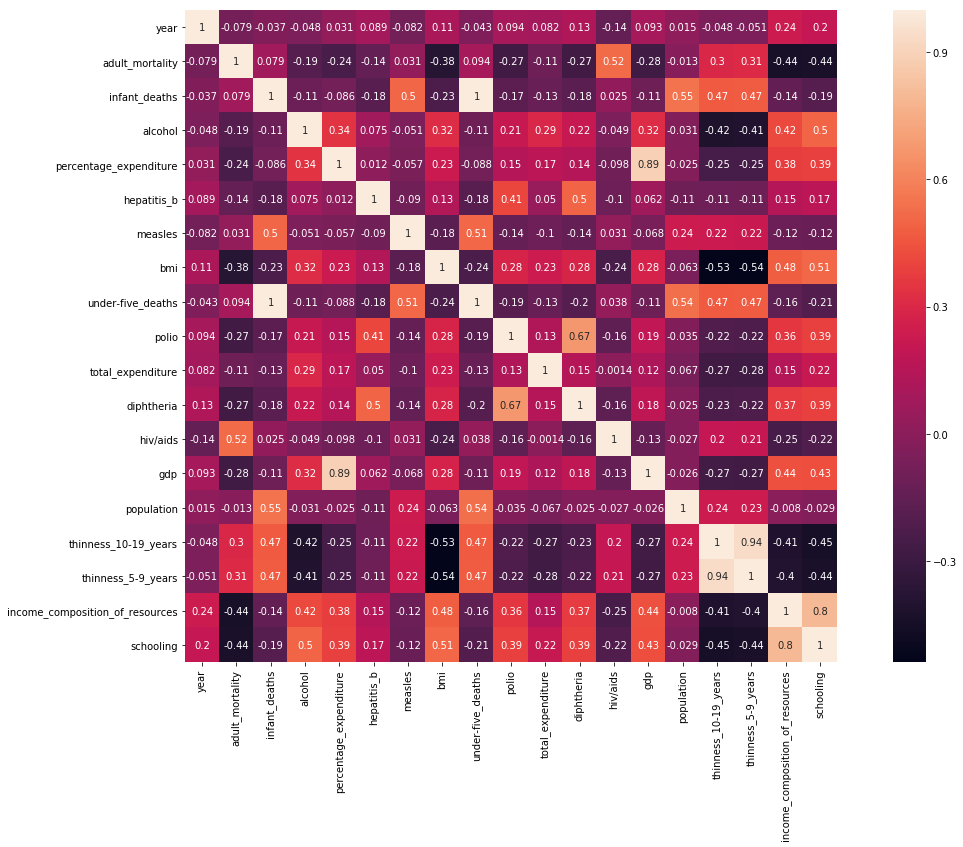

In [16]:
corr = train_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,square=True,annot=True)

In [17]:
col_corr = []
for i in range(len(corr.columns)):
        for j in range(i):
            if (corr.iloc[i, j] >= 0.9) and (corr.columns[j] not in col_corr):
                colname = corr.columns[i] # getting the name of column
                if colname not in col_corr:
                    col_corr.append(colname)
                if colname in train_data.columns:
                    del train_data[colname]

In [18]:
col_corr #these columns are removed

['under-five_deaths', 'thinness_5-9_years']

In [19]:
train_data.shape

(2938, 19)

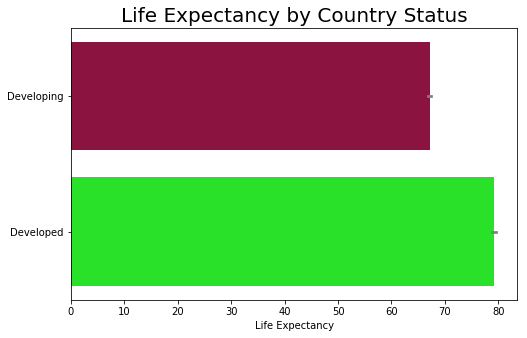

In [20]:
# Plotting Developed v Developing
plt.figure(figsize=(8,5))

sns.barplot(y='status', x='life_expectancy', data=df, orient='h', 
            palette = ['xkcd:cranberry','xkcd:neon green'], errcolor='grey');
plt.title('Life Expectancy by Country Status', fontsize=20)
plt.xlabel('Life Expectancy')
plt.ylabel('');

# Calculation of p-value

In [21]:
X = train_data.iloc[:,3:].values
y = train_labels.values

In [22]:
import statsmodels.api as sm

mod = sm.OLS(y,X)

fii = mod.fit()

p_values = fii.summary2().tables[1]['P>|t|']


In [23]:
print(p_values)

x1      1.934024e-20
x2      8.814601e-01
x3      9.782452e-02
x4      6.545038e-01
x5      8.319670e-30
x6      4.331996e-03
x7      3.483851e-41
x8      3.207873e-26
x9      3.972871e-58
x10     2.642926e-13
x11     2.197431e-61
x12     6.168999e-01
x13     6.111093e-01
x14     1.245364e-68
x15     4.426555e-28
x16    1.347924e-106
Name: P>|t|, dtype: float64


In [24]:
columns = train_data.columns
reduce = []
for i in range(len(p_values)):
    if(p_values[i]>0.05):
        print(columns[i+3],p_values[i])
        reduce.append(columns[i+3])

infant_deaths 0.8814600848870734
alcohol 0.09782452484648317
percentage_expenditure 0.6545037967086833
gdp 0.6168999457312259
population 0.6111092930813469


In [25]:
#drop columns with higher p_values
train_data=train_data.drop(reduce,axis=1)

In [26]:
columns = train_data.columns
print(columns)

Index(['country', 'year', 'status', 'adult_mortality', 'hepatitis_b',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness_10-19_years', 'income_composition_of_resources',
       'schooling'],
      dtype='object')


In [32]:
train_data = train_data.drop(['country'],axis=1)

# MultiLinear Regression

In [33]:
X = train_data.iloc[:,:].values
y = train_labels.values

In [42]:
from sklearn.preprocessing import LabelEncoder
# labelencoder_X = LabelEncoder()
# X[:,0] = labelencoder_X.fit_transform(X[:,0])
labelencoder_X_2 = LabelEncoder()
X[:,1] = labelencoder_X_2.fit_transform(X[:,1])

In [43]:
X.shape

(2938, 13)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([78.80182946, 83.04949895, 75.20872178, 64.01939477, 63.65324192,
       71.84811982, 73.47350437, 60.77187706, 53.99287963, 58.55150331])

In [47]:
#mse
mse=mean_squared_error(y_test, y_pred)
#r2
r2=r2_score(y_test,y_pred)
#mae
mae=mean_absolute_error(y_test,y_pred)
#rmse
rmse=np.sqrt(mae)
#To retrieve the intercept
intercept=reg.intercept_
#For retrieving the slope
coef = reg.coef_
{'mse':[mse],'r2':[r2],'mae':[mae],'rmse':[rmse],'intercept':[intercept],'coef':coef[0]}



{'mse': [20.64310546991208],
 'r2': [0.787185945053893],
 'mae': [3.2859233507477037],
 'rmse': [1.8127116016475715],
 'intercept': [89.55730538177195],
 'coef': -0.017004682512760928}

In [48]:
#accuracy
error = []
for i in range(len(y_test)):
    a=abs(y_test[i]-y_pred[i])
    error.append(a)
acc=100-(sum(error)/len(y_test))

In [49]:
round(acc,2)

96.71

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor 
regres = DecisionTreeRegressor()
regres.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [51]:
y_pred = reg.predict(X_test)

In [52]:
#mse
mse=mean_squared_error(y_test, y_pred)
#r2
r2=r2_score(y_test,y_pred)
#mae
mae=mean_absolute_error(y_test,y_pred)
#rmse
rmse=np.sqrt(mae)
#To retrieve the intercept
intercept=reg.intercept_
#For retrieving the slope
coef = reg.coef_
{'mse':[mse],'r2':[r2],'mae':[mae],'rmse':[rmse],'intercept':[intercept],'coef':coef[0]}



{'mse': [20.64310546991208],
 'r2': [0.787185945053893],
 'mae': [3.2859233507477037],
 'rmse': [1.8127116016475715],
 'intercept': [89.55730538177195],
 'coef': -0.017004682512760928}

In [53]:
error = []
for i in range(len(y_test)):
    a=abs(y_test[i]-y_pred[i])
    error.append(a)
acc=100-(sum(error)/len(y_test))

In [54]:
round(acc,2)

96.71

# Random Forest Regression

In [55]:
reger = RandomForestRegressor(n_estimators= 50, random_state = 0)
reger.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
y_pred = reger.predict(X_test)

In [57]:

#mse
mse=mean_squared_error(y_test, y_pred)
#r2
r2=r2_score(y_test,y_pred)
#mae
mae=mean_absolute_error(y_test,y_pred)
#rmse
rmse=np.sqrt(mae)
{'mse':[mse],'r2':[r2],'mae':[mae],'rmse':[rmse]}

{'mse': [3.849796928391985],
 'r2': [0.9603116451522129],
 'mae': [1.2650834680866887],
 'rmse': [1.1247592933986759]}

In [58]:
#accuracy
error = []
for i in range(len(y_test)):
    a=abs(y_test[i]-y_pred[i])
    error.append(a)
acc=100-(sum(error)/len(y_test))

In [59]:
acc

98.73491653191331

In [60]:
X = pd.DataFrame(X)
X.columns = [ 'year', 'status', 'adult_mortality', 'hepatitis_b',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness_10-19_years', 'income_composition_of_resources',
       'schooling']

[6.75005489e-03 4.15143026e-04 1.73111015e-01 2.78564231e-03
 5.44970462e-03 2.13578435e-02 5.51669420e-03 7.32728943e-03
 4.56289401e-03 5.93829968e-01 1.24934692e-02 1.42274312e-01
 2.41259704e-02]


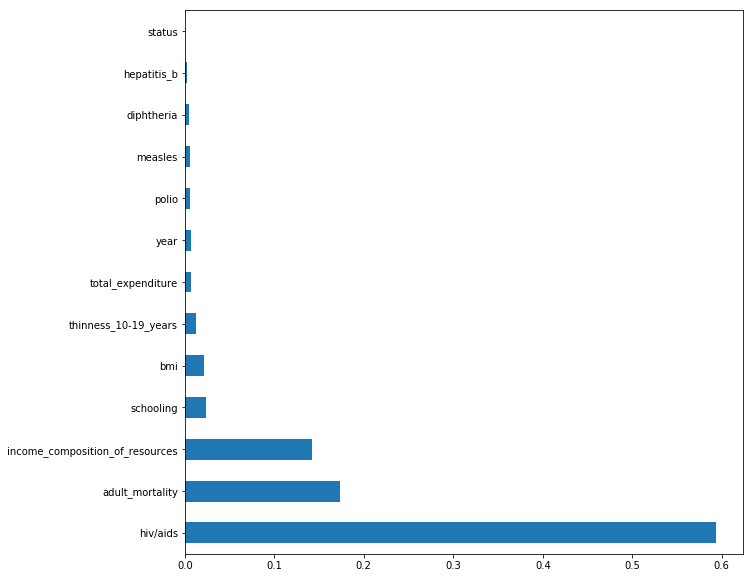

In [61]:
# Get Feature Importance from the classifier
feature_importance = reger.feature_importances_
print (reger.feature_importances_)
feat_importances = pd.Series(reger.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))

# Save and Deploy Model

In [62]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials = {
  "apikey": "XXXXXX",
  "iam_apikey_description": "XXXXX",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "XXXXX",
  "iam_serviceid_crn": "XXXXX",
  "instance_id": "XXXXX",
  "url": "XXXXX"
}

2020-06-10 11:56:29,540 - watson_machine_learning_client.wml_client_error - WARNING - Failure during scoring. (POST https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ed737bfd-0967-4aa2-9839-59cbca57d914/deployments/330c1f2d-b4fb-436e-a713-2ee5d3fe845a/online)
Status code: 400, body: {"trace": "b886fc321069782fc332d4ae8cae0a02", "errors": [{"code": "invalid_input_data", "message": "Feature number mismatch. Number of features of fields must match the number of columns in input data", "target": {"type": "field", "name": "values"}}], "status_code": 400}



In [63]:
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.version)

1.0.376


In [64]:
client.repository.list_models()
client.deployments.list()

------------------------------------  ----------------------------------------  ------------------------  -----------------
GUID                                  NAME                                      CREATED                   FRAMEWORK
9a8a65ea-53db-4337-ac79-79e3414d7e43  Random Forest to predict life expectancy  2020-06-10T11:24:47.716Z  scikit-learn-0.20
------------------------------------  ----------------------------------------  ------------------------  -----------------
------------------------------------  ----------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                          TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
4f6836e5-e90e-4738-b053-6e141873031c  life_expectancy_model_deploy  online  DEPLOY_SUCCESS  2020-06-10T11:24:54.328Z  scikit-learn-0.20  model
------------------------------------  ---------------------------- 

In [65]:
meta_props={client.repository.ModelMetaNames.NAME: "Random Forest to predict life expectancy"}
published_model = client.repository.store_model(model=reger, meta_props={client.repository.ModelMetaNames.NAME: "Random Forest to predict life expectancy"})



In [66]:
# new list of models
client.repository.list_models()

------------------------------------  ----------------------------------------  ------------------------  -----------------
GUID                                  NAME                                      CREATED                   FRAMEWORK
da5dd6bf-7184-4c2f-ba61-89379b87e87f  Random Forest to predict life expectancy  2020-06-10T11:56:16.931Z  scikit-learn-0.20
9a8a65ea-53db-4337-ac79-79e3414d7e43  Random Forest to predict life expectancy  2020-06-10T11:24:47.716Z  scikit-learn-0.20
------------------------------------  ----------------------------------------  ------------------------  -----------------


In [67]:
# get UID of our just stored model
model_uid = client.repository.get_model_uid(published_model)
print("Model id: {}".format(model_uid))

Model id: da5dd6bf-7184-4c2f-ba61-89379b87e87f


In [68]:
# create deployment
created_deployment = client.deployments.create(model_uid, name="life_expectancy_model_deploy")



#######################################################################################

Synchronous deployment creation for uid: 'da5dd6bf-7184-4c2f-ba61-89379b87e87f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='330c1f2d-b4fb-436e-a713-2ee5d3fe845a'
------------------------------------------------------------------------------------------------




In [69]:
# new list of deployments
client.deployments.list()

------------------------------------  ----------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                          TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
330c1f2d-b4fb-436e-a713-2ee5d3fe845a  life_expectancy_model_deploy  online  DEPLOY_SUCCESS  2020-06-10T11:56:23.512Z  scikit-learn-0.20  model
4f6836e5-e90e-4738-b053-6e141873031c  life_expectancy_model_deploy  online  DEPLOY_SUCCESS  2020-06-10T11:24:54.328Z  scikit-learn-0.20  model
------------------------------------  ----------------------------  ------  --------------  ------------------------  -----------------  -------------


In [70]:
# get UID of our new deployment
deployment_uid = client.deployments.get_uid(created_deployment)
print("Deployment id: {}".format(deployment_uid))
print(created_deployment)

Deployment id: 330c1f2d-b4fb-436e-a713-2ee5d3fe845a
{'metadata': {'guid': '330c1f2d-b4fb-436e-a713-2ee5d3fe845a', 'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ed737bfd-0967-4aa2-9839-59cbca57d914/deployments/330c1f2d-b4fb-436e-a713-2ee5d3fe845a', 'created_at': '2020-06-10T11:56:23.512Z', 'modified_at': '2020-06-10T11:56:23.851Z'}, 'entity': {'runtime_environment': 'python-3.6', 'name': 'life_expectancy_model_deploy', 'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ed737bfd-0967-4aa2-9839-59cbca57d914/deployments/330c1f2d-b4fb-436e-a713-2ee5d3fe845a/online', 'deployable_asset': {'name': 'Random Forest to predict life expectancy', 'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ed737bfd-0967-4aa2-9839-59cbca57d914/published_models/da5dd6bf-7184-4c2f-ba61-89379b87e87f', 'guid': 'da5dd6bf-7184-4c2f-ba61-89379b87e87f', 'created_at': '2020-06-10T11:56:23.484Z', 'type': 'model'}, 'description': 'Description of deployment', 'status_details': {'status': 'DEPLO

In [71]:
# get scoring end point
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ed737bfd-0967-4aa2-9839-59cbca57d914/deployments/330c1f2d-b4fb-436e-a713-2ee5d3fe845a/online


In [77]:
# use our WML client to score our model

# add some test data
scoring_payload = {'fields': [ 'year', 'status', 'adult_mortality', 'hepatitis_b',
       'measles', 'bmi', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness_10-19_years', 'income_composition_of_resources',
       'schooling'],'values': [[2010,0,121,94,17,59.8,95,6.55,94,0.1,1,0.802,16.8]]}




In [78]:
# score the model
predictions = client.deployments.score(scoring_endpoint, scoring_payload)
print(predictions)

{'fields': ['prediction'], 'values': [[74.66600000000001]]}
